<div class="alert alert-block alert-warning">

<h1>Combined Cycle Powerplant</h1>
    
<a href="https://www.kaggle.com/datasets/gova26/airpressure">Kaggle Link</a>

    
<h2>About Dataset</h2>
<p>Dataset Information</p>
<blockquote>
<p>The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.</p>

<p> A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.</p>
</blockquote>
</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>Temperature (T):</strong> In the range 1.81°C and 37.11°C,</p>
    <p><strong>Exhaust Vacuum (V):</strong> In teh range 25.36-81.56 cm Hg.</p>
    <p><strong>Ambient Pressure (AP):</strong> In the range 992.89-1033.30 milibar.</p>
    <p><strong>Relative Humidity (RH):</strong> in the range 25.56% to 100.16%.</p>
    <p><strong>Net hourly electrical energy output (EP):</strong> 420.26-495.76 MW.</p>
</div>

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [5]:
df = pd.read_csv('Folds5x2_pp.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## EDA

In [6]:
df.shape

(9568, 5)

In [7]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [10]:
df.corr()['PE'].sort_values(ascending=False)[1:]

AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64

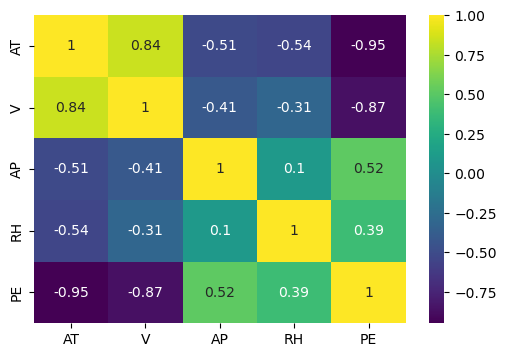

In [11]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.show()

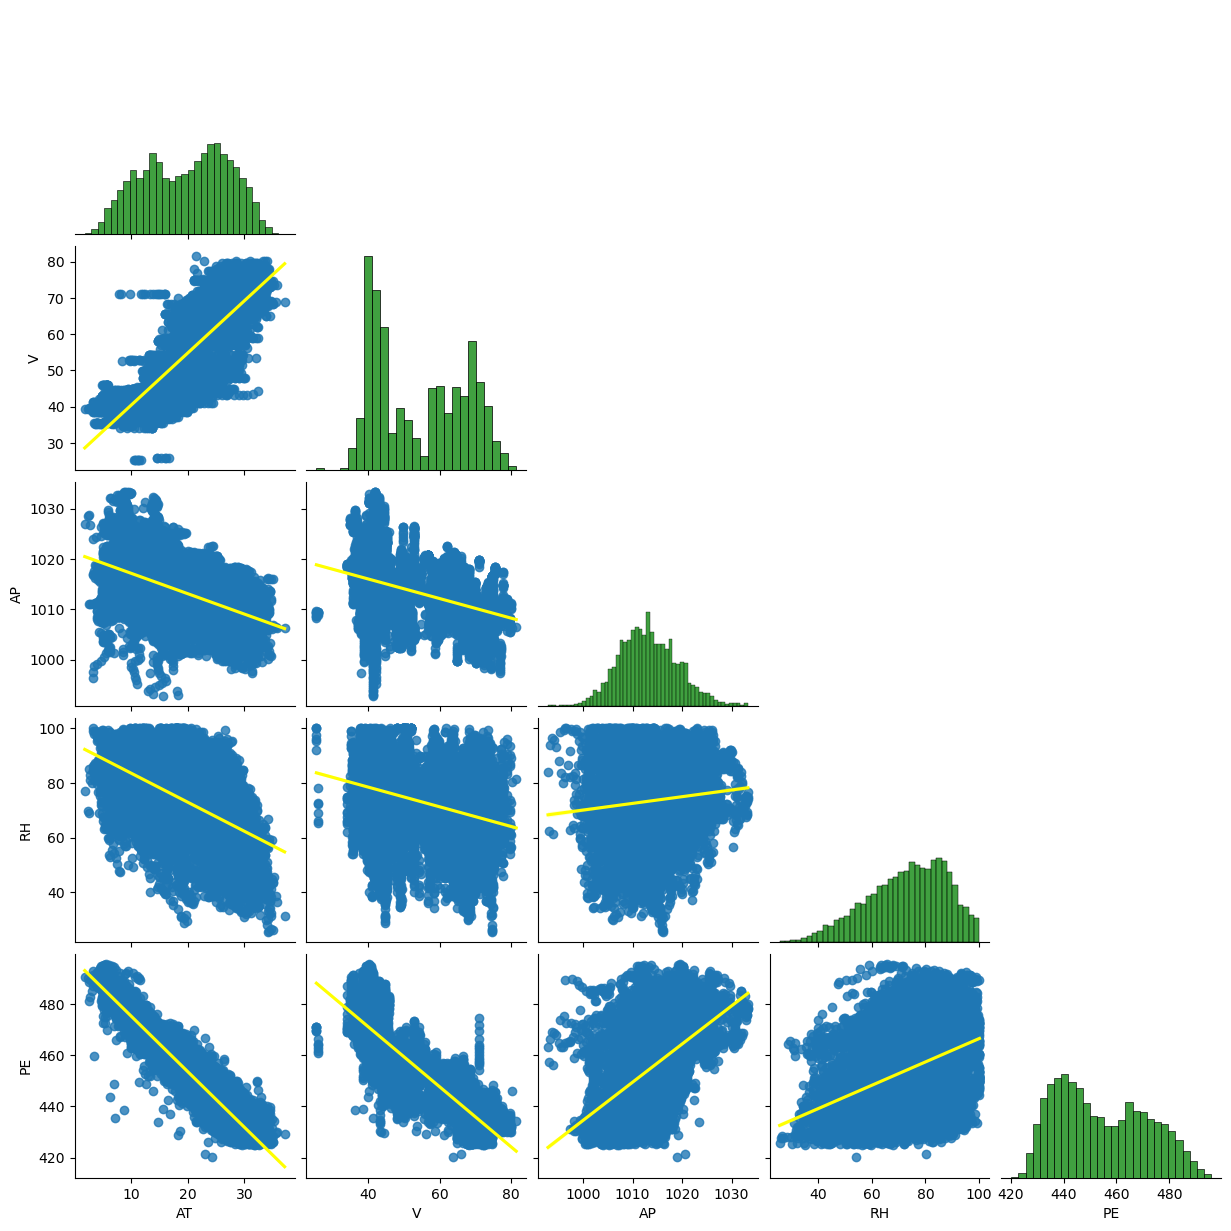

In [12]:
sns.pairplot(df,kind='reg',diag_kws={'color':'green'},plot_kws={'line_kws':{'color':'yellow'}},corner=True);

## Create Independent and Dependent Variables

In [13]:
X = df.drop('PE',axis = 1).values
y = df['PE']

## Split the Data into the Train and Test Set

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## CNN Model

In [18]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))

model.add(Dense(units=6,activation='relu'))

model.add(Dense(units=1,activation=None))

model.compile(optimizer='adam', loss='mse')

In [19]:
early_stopping = EarlyStopping(patience=5,monitor = 'val_loss')

In [20]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])
losses = pd.DataFrame(model.history.history)

Epoch 1/100
210/210 [==============================] - 0s 1ms/step - loss: 206586.0000 - val_loss: 205322.6719
Epoch 2/100
210/210 [==============================] - 0s 711us/step - loss: 201460.8594 - val_loss: 196115.6562
Epoch 3/100
210/210 [==============================] - 0s 749us/step - loss: 187329.7500 - val_loss: 176360.7656
Epoch 4/100
210/210 [==============================] - 0s 712us/step - loss: 162159.0156 - val_loss: 145849.7500
Epoch 5/100
210/210 [==============================] - 0s 735us/step - loss: 128272.7266 - val_loss: 109492.2500
Epoch 6/100
210/210 [==============================] - 0s 787us/step - loss: 92323.8672 - val_loss: 75301.7500
Epoch 7/100
210/210 [==============================] - 0s 693us/step - loss: 61866.8242 - val_loss: 49688.1797
Epoch 8/100
210/210 [==============================] - 0s 711us/step - loss: 40775.0703 - val_loss: 33484.9492
Epoch 9/100
210/210 [==============================] - 0s 744us/step - loss: 27870.4258 - val_loss: 2383

<AxesSubplot:>

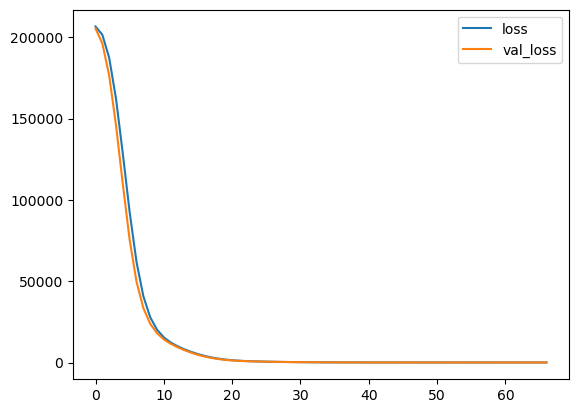

In [21]:
losses.plot()

In [22]:
y_pred = model.predict(X_test)

In [23]:
r2 = round(r2_score(y_test,y_pred),2)
mae = round(mean_absolute_error(y_test,y_pred),2)
mse = round(mean_squared_error(y_test,y_pred),2)
rmse = round(np.sqrt(mse),2)

print(f'r2:\t{r2}\nmae:\t{mae}\nmse:\t{mse}\nrmse:\t{rmse}')

r2:	0.93
mae:	3.49
mse:	19.29
rmse:	4.39


In [24]:
predictions_df = pd.DataFrame(np.ravel(y_pred),columns=["Predictions"])

In [25]:
comparison_df = pd.concat([pd.DataFrame(np.array(y_test),columns=["Real Values"]), predictions_df],axis=1)

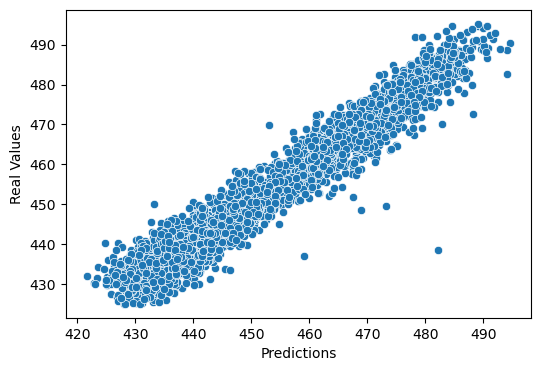

In [26]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Predictions',y = 'Real Values',data = comparison_df);

## Predict a Single Value

In [27]:
while True:
    try:
        at = float(input('(°C) Temperature:\t\t'))
        v =  float(input('(cmHg) Exhaust Vacuum:\t\t'))
        ap = float(input('(milibar) Ambient Pressure:\t'))
        rh = float(input('(%) Relative Humidity:\t\t'))

        values = sc.transform([[at,v,ap,rh]])
        prediction = model.predict(values)[0][0]
        prediction = round(prediction,2)
        
        print(f'\nThe Predicted Net hourly electrical energy output (EP) is:',prediction,'MW')
        
    except Exception as ex:
        print(ex)
    finally:
        choice = input("Press any key to continue or press 'e' to exit: ").lower()
        if choice == 'e':
            break

(°C) Temperature:		11.80
(cmHg) Exhaust Vacuum:		40.66
(milibar) Ambient Pressure:	1017.13
(%) Relative Humidity:		97.20

The Predicted Net hourly electrical energy output (EP) is: 470.13 MW
Press any key to continue or press 'e' to exit: e


## Save the CNN Model

In [28]:
try:
    choice = input("Press any key to save model or press 'e' to cancel").lower()
    if choice != 'e':
        model.save('my_model.h5')
        print('Model Saved!')
    else:
        print('Model Not Saved!')
except Exception as ex:
    print(ex)

Press any key to save model or press 'e' to cancel
Model Saved!
